# <font color='brown'> **Tarea 1 Effective Spread**
## <font color='rosybrown'> **Arantza Gomez Haro Gamboa**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <font color='rosybrown'> **Datos:**

In [2]:
df = pd.read_csv('aapl_5m_train.csv')
df

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1609770600,0,2021-01-04 14:30:00,133.570007,133.611602,132.389999,132.809997,6624663.0
1,1,1609770900,0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,2541553.0
2,2,1609771200,0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,2492415.0
3,3,1609771500,0,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,1859131.0
4,4,1609771800,0,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,1780105.0
...,...,...,...,...,...,...,...,...,...
39574,19788,1672432800,0,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,833767.0
39575,19789,1672433100,0,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,2136910.0
39576,19790,1672433400,0,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,2879267.0
39577,19791,1672433700,0,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,3896812.0


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Timestamp', 'Gmtoffset', 'Volume', 'Open', 'High', 'Low', 'Datetime'], axis = 1)
df['Delta'] = df['Close'].diff()
df = df.dropna().reset_index(drop=True)
df

,Close,Delta
0,131.889999,-0.919998
1,132.059997,0.169998
2,132.250000,0.190003
3,131.589996,-0.660004
4,131.448898,-0.141098
...,...,...
39567,129.054992,0.014999
39568,129.380004,0.325012
39569,129.764404,0.384400
39570,129.949996,0.185592


### <font color='rosybrown'> **Block Method:**

In [4]:
windows = [5, 10, 20, 50, 100]
df1 = df.copy()

In [5]:
for window in windows:
    spread = []
    for i in range(len(df1) - 2 * window + 1):
        window1 = df1['Delta'][i:i + window]
        window2 = df1['Delta'][i + window:i + 2 * window]
        covariance = np.abs(np.cov(window1, window2)[0][1])
        spread_value = 2 * np.sqrt(abs(covariance))
        spread.append(spread_value)
    df1[f'Spread{window}'] = [np.nan] * (2*window - 1) + spread
    
    df1[f'Bid{window}'] = np.where((df1['Delta'] > 0), df1['Close'] - df1[f'Spread{window}'], df1['Close'])
    df1[f'Ask{window}'] = np.where((df1['Delta'] > 0), df1['Close'], df1['Close'] + df1[f'Spread{window}'])

df1     

,Close,Delta,Spread5,Bid5,Ask5,Spread10,Bid10,Ask10,Spread20,Bid20,Ask20,Spread50,Bid50,Ask50,Spread100,Bid100,Ask100
0,131.889999,-0.919998,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN
1,132.059997,0.169998,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997
2,132.250000,0.190003,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000
3,131.589996,-0.660004,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN
4,131.448898,-0.141098,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,129.054992,0.014999,0.143989,128.911003,129.054992,0.064309,128.990683,129.054992,0.086049,128.968943,129.054992,0.046804,129.008188,129.054992,0.200519,128.854473,129.054992
39568,129.380004,0.325012,0.205689,129.174315,129.380004,0.028237,129.351767,129.380004,0.070957,129.309047,129.380004,0.047191,129.332813,129.380004,0.200046,129.179958,129.380004
39569,129.764404,0.384400,0.176345,129.588059,129.764404,0.192435,129.571969,129.764404,0.108540,129.655864,129.764404,0.036521,129.727883,129.764404,0.202426,129.561978,129.764404
39570,129.949996,0.185592,0.176193,129.773803,129.949996,0.182080,129.767916,129.949996,0.078493,129.871503,129.949996,0.054715,129.895281,129.949996,0.203482,129.746514,129.949996


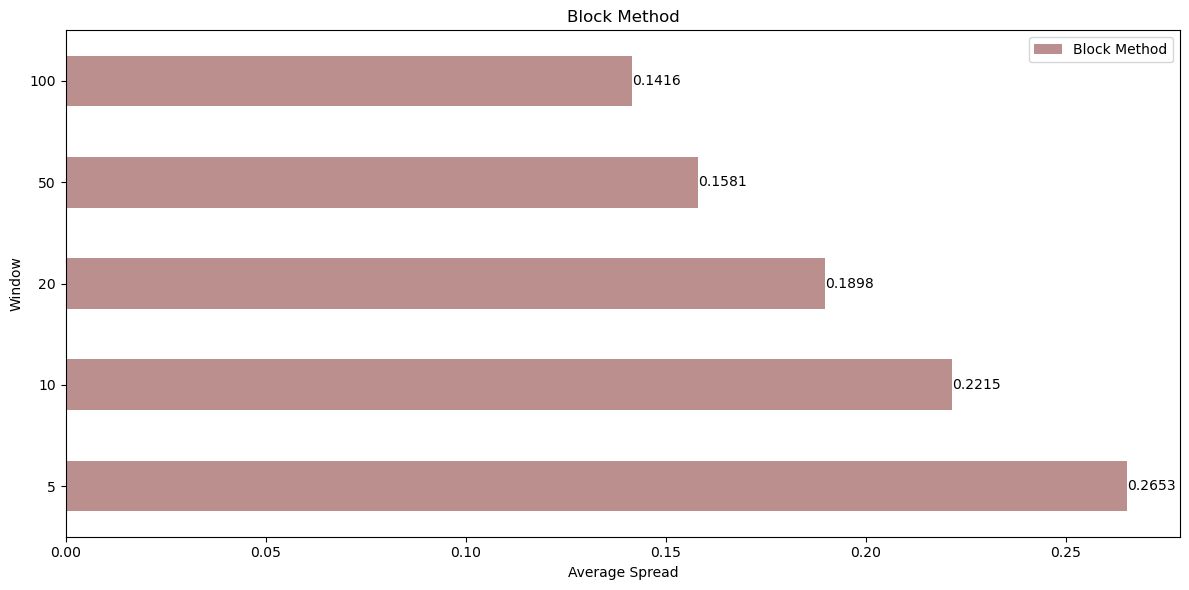

In [6]:
valores_b = pd.DataFrame({
    'Window': windows,
    'Block Method': [df1[f'Spread{window}'].mean() for window in windows]})

b = valores_b.plot(x='Window', 
                     y = ['Block Method'],
                     kind='barh',
                     figsize=(12, 6),
                     color = 'rosybrown')

plt.title('Block Method')
plt.xlabel('Average Spread')
plt.ylabel('Window')
plt.legend()
plt.tight_layout()

for bars in b.containers:
    b.bar_label(bars, fmt='%.4f')
plt.show()

### <font color='rosybrown'> **Serial Covariance:**

In [7]:
df2 = df.copy()
df2['Delta2'] = df2['Close'].diff().shift(-1)
df2 = df2.dropna().reset_index(drop=True)
df2.head()

,Close,Delta,Delta2
0,131.889999,-0.919998,0.169998
1,132.059997,0.169998,0.190003
2,132.250000,0.190003,-0.660004
3,131.589996,-0.660004,-0.141098
4,131.448898,-0.141098,-0.328903


In [8]:
for window in windows:
    covariance = df2['Delta'].rolling(window=window).cov(df2['Delta2'])
    df2[f'Spread{window}'] = 2 * np.sqrt(abs(covariance))

    df2[f'Bid{window}'] = np.where((df2['Delta'] > 0), df2['Close'] - df2[f'Spread{window}'], df2['Close'])
    df2[f'Ask{window}'] = np.where((df2['Delta'] > 0), df2['Close'], df2['Close'] + df2[f'Spread{window}'])

df2

,Close,Delta,Delta2,Spread5,Bid5,Ask5,Spread10,Bid10,Ask10,Spread20,Bid20,Ask20,Spread50,Bid50,Ask50,Spread100,Bid100,Ask100
0,131.889999,-0.919998,0.169998,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN
1,132.059997,0.169998,0.190003,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997
2,132.250000,0.190003,-0.660004,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000
3,131.589996,-0.660004,-0.141098,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN
4,131.448898,-0.141098,-0.328903,0.565312,131.448898,132.014210,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39566,129.039993,0.019989,0.014999,0.092807,128.947186,129.039993,0.170663,128.869330,129.039993,0.089920,128.950073,129.039993,0.079913,128.960080,129.039993,0.132918,128.907075,129.039993
39567,129.054992,0.014999,0.325012,0.109240,128.945752,129.054992,0.184538,128.870454,129.054992,0.120792,128.934200,129.054992,0.088185,128.966807,129.054992,0.133413,128.921579,129.054992
39568,129.380004,0.325012,0.384400,0.231993,129.148011,129.380004,0.074165,129.305839,129.380004,0.052312,129.327692,129.380004,0.052211,129.327793,129.380004,0.152079,129.227925,129.380004
39569,129.764404,0.384400,0.185592,0.211500,129.552904,129.764404,0.143741,129.620663,129.764404,0.091643,129.672761,129.764404,0.089236,129.675168,129.764404,0.161393,129.603011,129.764404


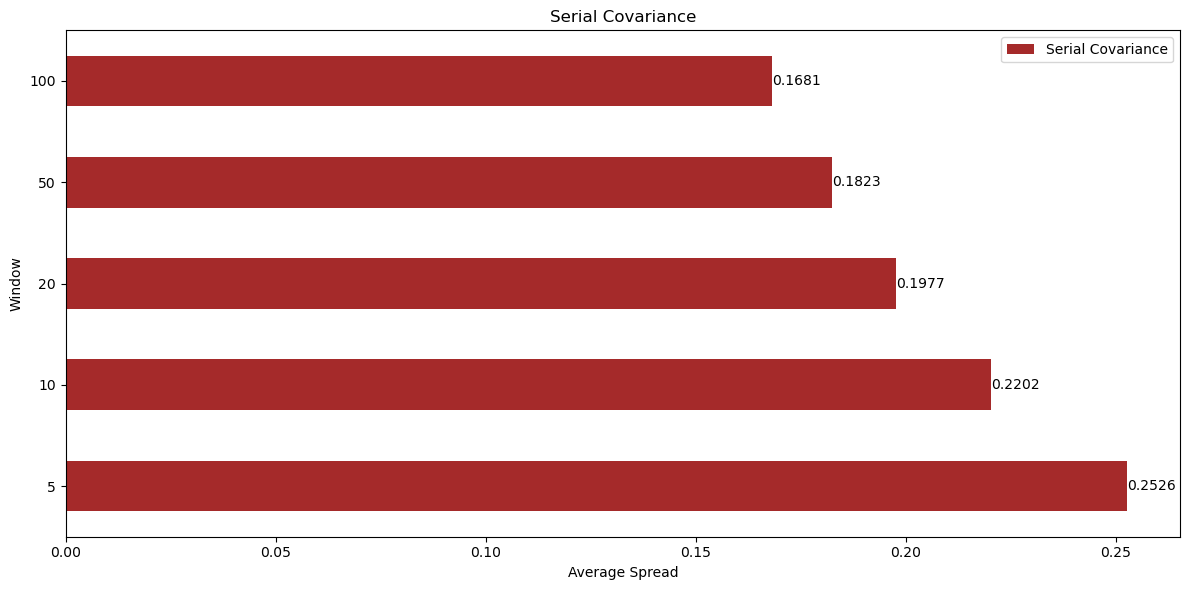

In [9]:
valores_sc = pd.DataFrame({
    'Window': windows,
    'Serial Covariance': [df2[f'Spread{window}'].mean() for window in windows]})

sc = valores_sc.plot(x='Window', 
                     y = ['Serial Covariance'],
                     kind='barh',
                     figsize=(12, 6),
                     color = 'brown')

plt.title('Serial Covariance')
plt.xlabel('Average Spread')
plt.ylabel('Window')
plt.legend()
plt.tight_layout()

for bars in sc.containers:
    sc.bar_label(bars, fmt='%.4f')
plt.show()


### <font color='rosybrown'> **Average Spread:**

In [10]:
tabla = pd.DataFrame({
    'Block Method': [df1[f'Spread{window}'].mean() for window in windows],
    'Serial Covariance': [df2[f'Spread{window}'].mean() for window in windows]  
},index=(windows))

tabla

,Block Method,Serial Covariance
5,0.265275,0.252618
10,0.221454,0.220229
20,0.189835,0.197749
50,0.158118,0.182324
100,0.141632,0.168074


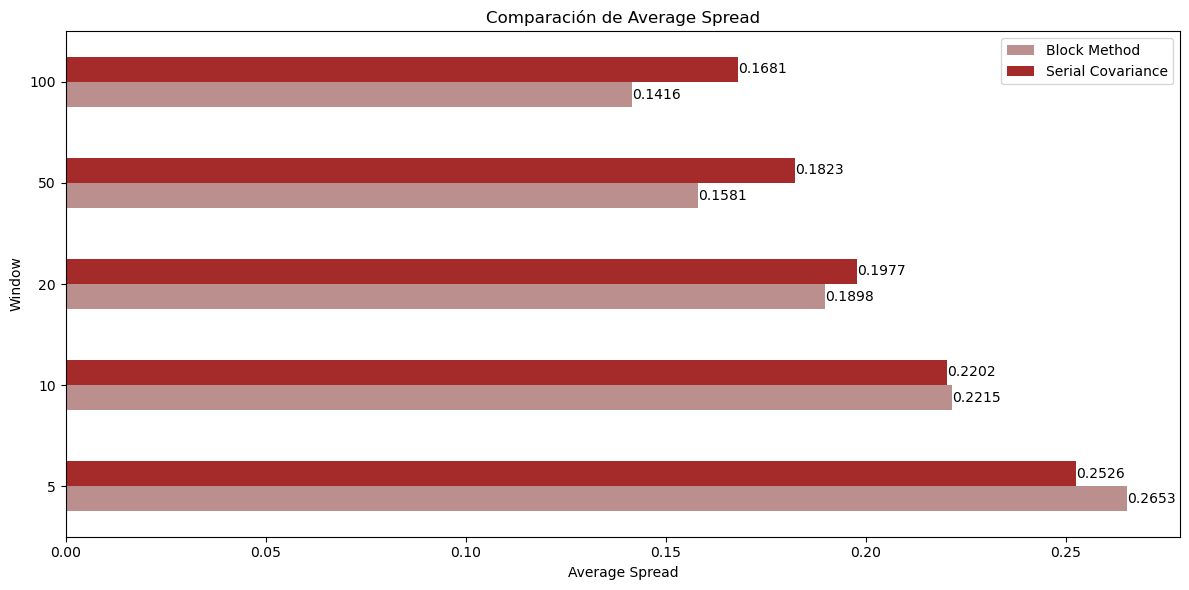

In [11]:
grafica = tabla.plot(y=['Block Method', 'Serial Covariance'],
           kind='barh',
           figsize=(12, 6),
           color = ['rosybrown','brown'])

plt.title('Comparación de Average Spread')
plt.xlabel('Average Spread')
plt.ylabel('Window')
plt.legend()
plt.tight_layout()

for bars in grafica.containers:
    grafica.bar_label(bars, fmt='%.4f')
plt.show()

### <font color='rosybrown'> **Análisis:**

- Tras realizar los cálculos anteriores con ambos métodos y considerando las ventanas establecidas, podemos ver claramente que, en los dos casos, los average spreads disminuyen conforme aumentan las windows. Es decir, a medida que se incrementa el tamaño de muestra (windows), el spread tiende a estabilizarse. Esto se debe a que, al usar más datos, el impacto de datos atípicos es menor, resultando en mayor estabilidad en los cálculos. Dicho esto, es importante mencionar que si existe un poco de diferencia entre los resultados obtenidos utilizando el block method y el serial covariance. Aunque la diferencia no es mucha, se puede concluir que el método de serial covariance es el que mejor se ajusta a la serie de tiempo del precio de la acción de Apple. Esto es debido a que el cálculo se realiza con los datos consecutivos, a diferencia del método block, el cual agrupa los datos en bloques o conjuntos. Esta diferencia en los cálculos permite que el método de serial covariance capture de mejor manera las variaciones en los precios, ya que el método block suaviza un poco más estas variaciones al considerar distintos conjuntos de datos en sus cálculos.  